**NAMA : NITA ANDRIANI** <br>
**NIM : 211351104** <br>
**KELAS : MALAM B**

# Import Dataset Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nitaandriani","key":"69ffc6f103688d8b348569fb66a49015"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d thedevastator/predicting-credit-card-customer-attrition-with-m

100% 379k/379k [00:00<00:00, 725kB/s]
100% 379k/379k [00:00<00:00, 725kB/s]


In [4]:
!mkdir predicting-credit-card-customer-attrition-with-m
!unzip predicting-credit-card-customer-attrition-with-m.zip -d predicting-credit-card-customer-attrition-with-m
!ls predicting-credit-card-customer-attrition-with-m

Archive:  predicting-credit-card-customer-attrition-with-m.zip
  inflating: predicting-credit-card-customer-attrition-with-m/BankChurners.csv  
BankChurners.csv


# Import Library yang dibutuhkan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Data Discovery

In [6]:
df = pd.read_csv('predicting-credit-card-customer-attrition-with-m/BankChurners.csv')

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [9]:
print(df.shape)

(10127, 23)


In [10]:
print(df.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [11]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [12]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [13]:
df_duplicated = df[df.duplicated()]
df_duplicated.shape[0]

0

# Exploratory Data Analysis

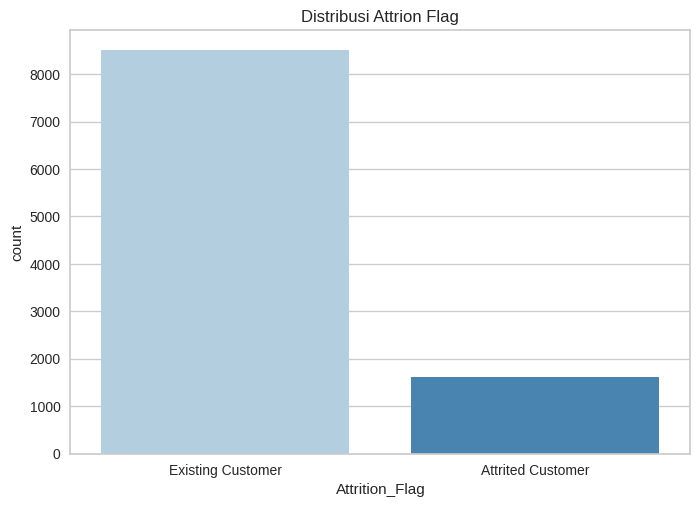

In [14]:
sns.countplot(x='Attrition_Flag',data=df,palette='Blues')
plt.title('Distribusi Attrion Flag');

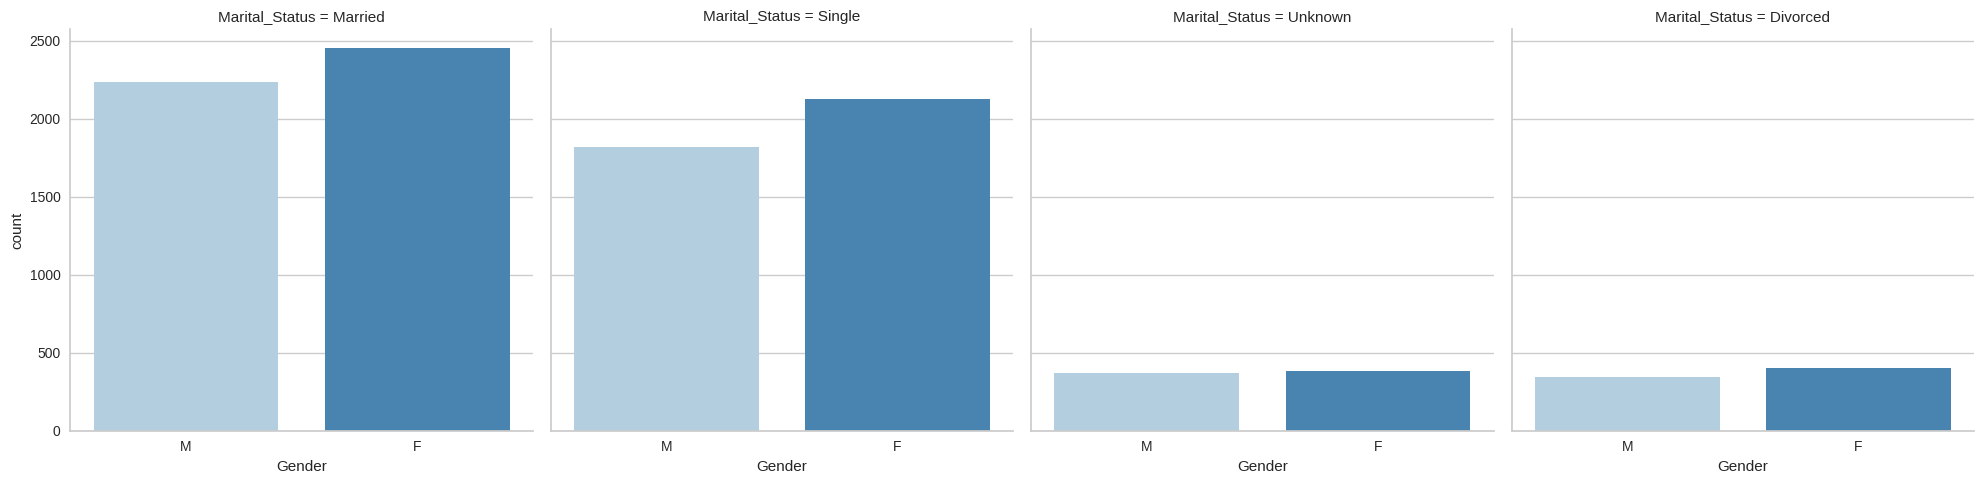

In [15]:
sns.catplot(x='Gender',data=df,palette='Blues',kind='count',col='Marital_Status');

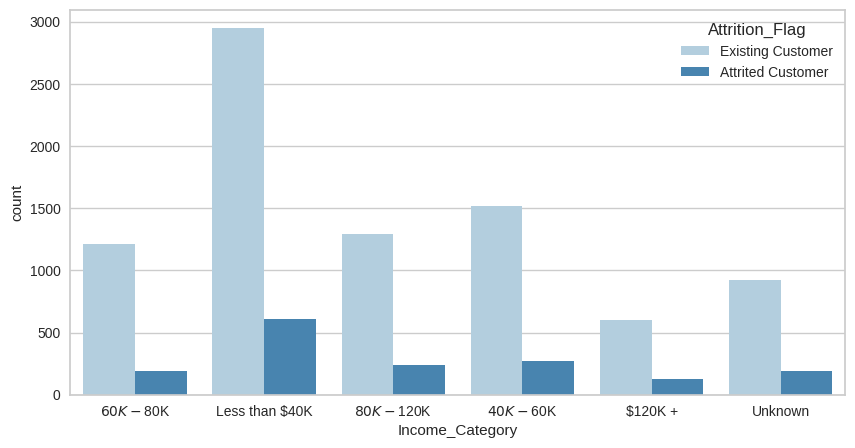

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income_Category',data=df,palette='Blues',hue='Attrition_Flag');

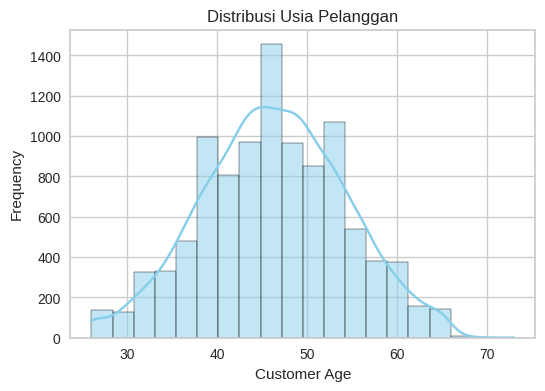

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Customer_Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

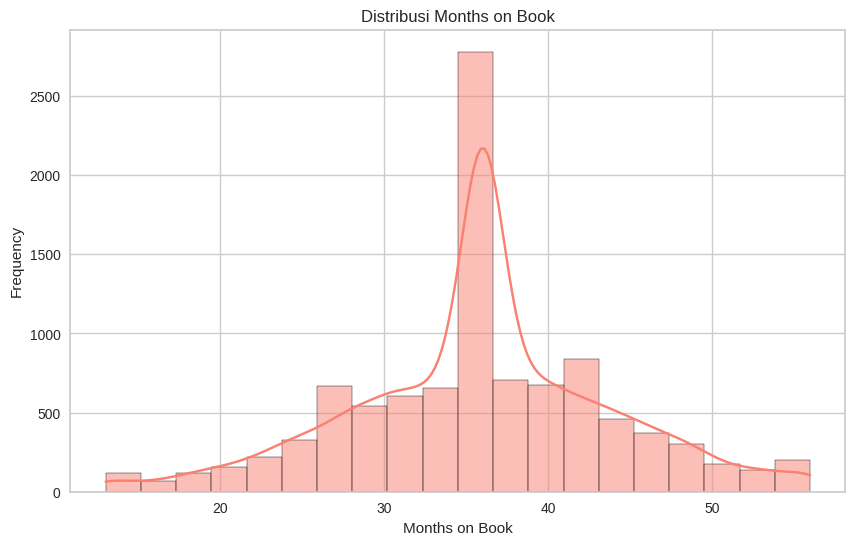

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Months_on_book'], bins=20, kde=True, color='salmon')
plt.title('Distribusi Months on Book')
plt.xlabel('Months on Book')
plt.ylabel('Frequency')
plt.show()

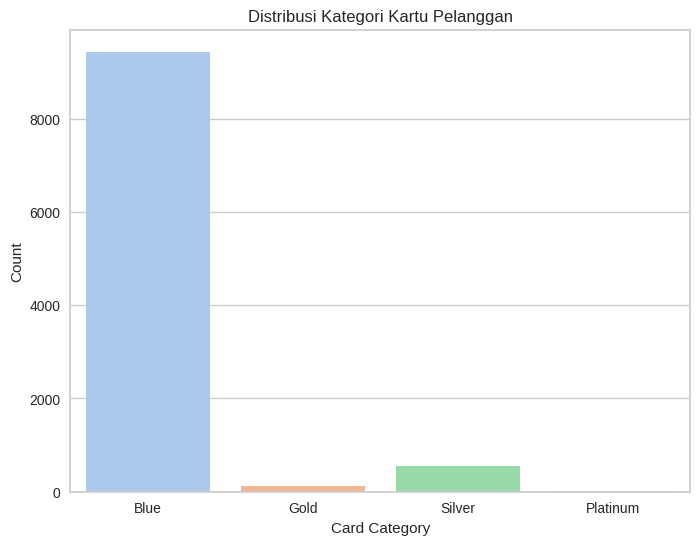

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Card_Category', data=df, palette='pastel')
plt.title('Distribusi Kategori Kartu Pelanggan')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.show()

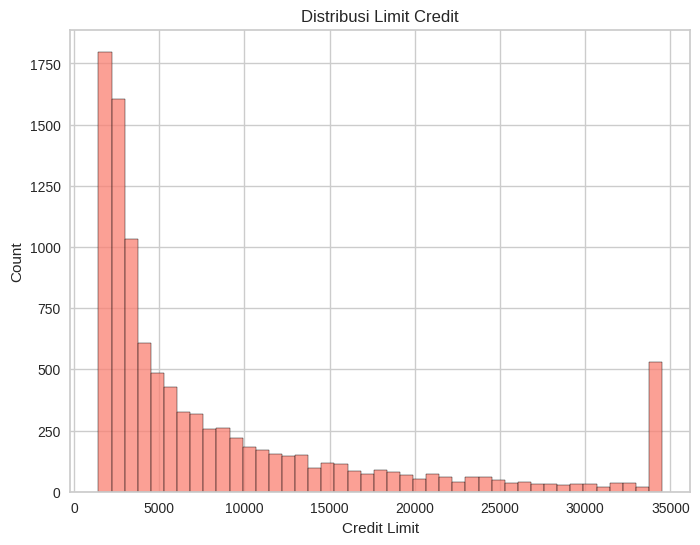

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Credit_Limit'], color='salmon')
plt.title('Distribusi Limit Credit')
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.show()

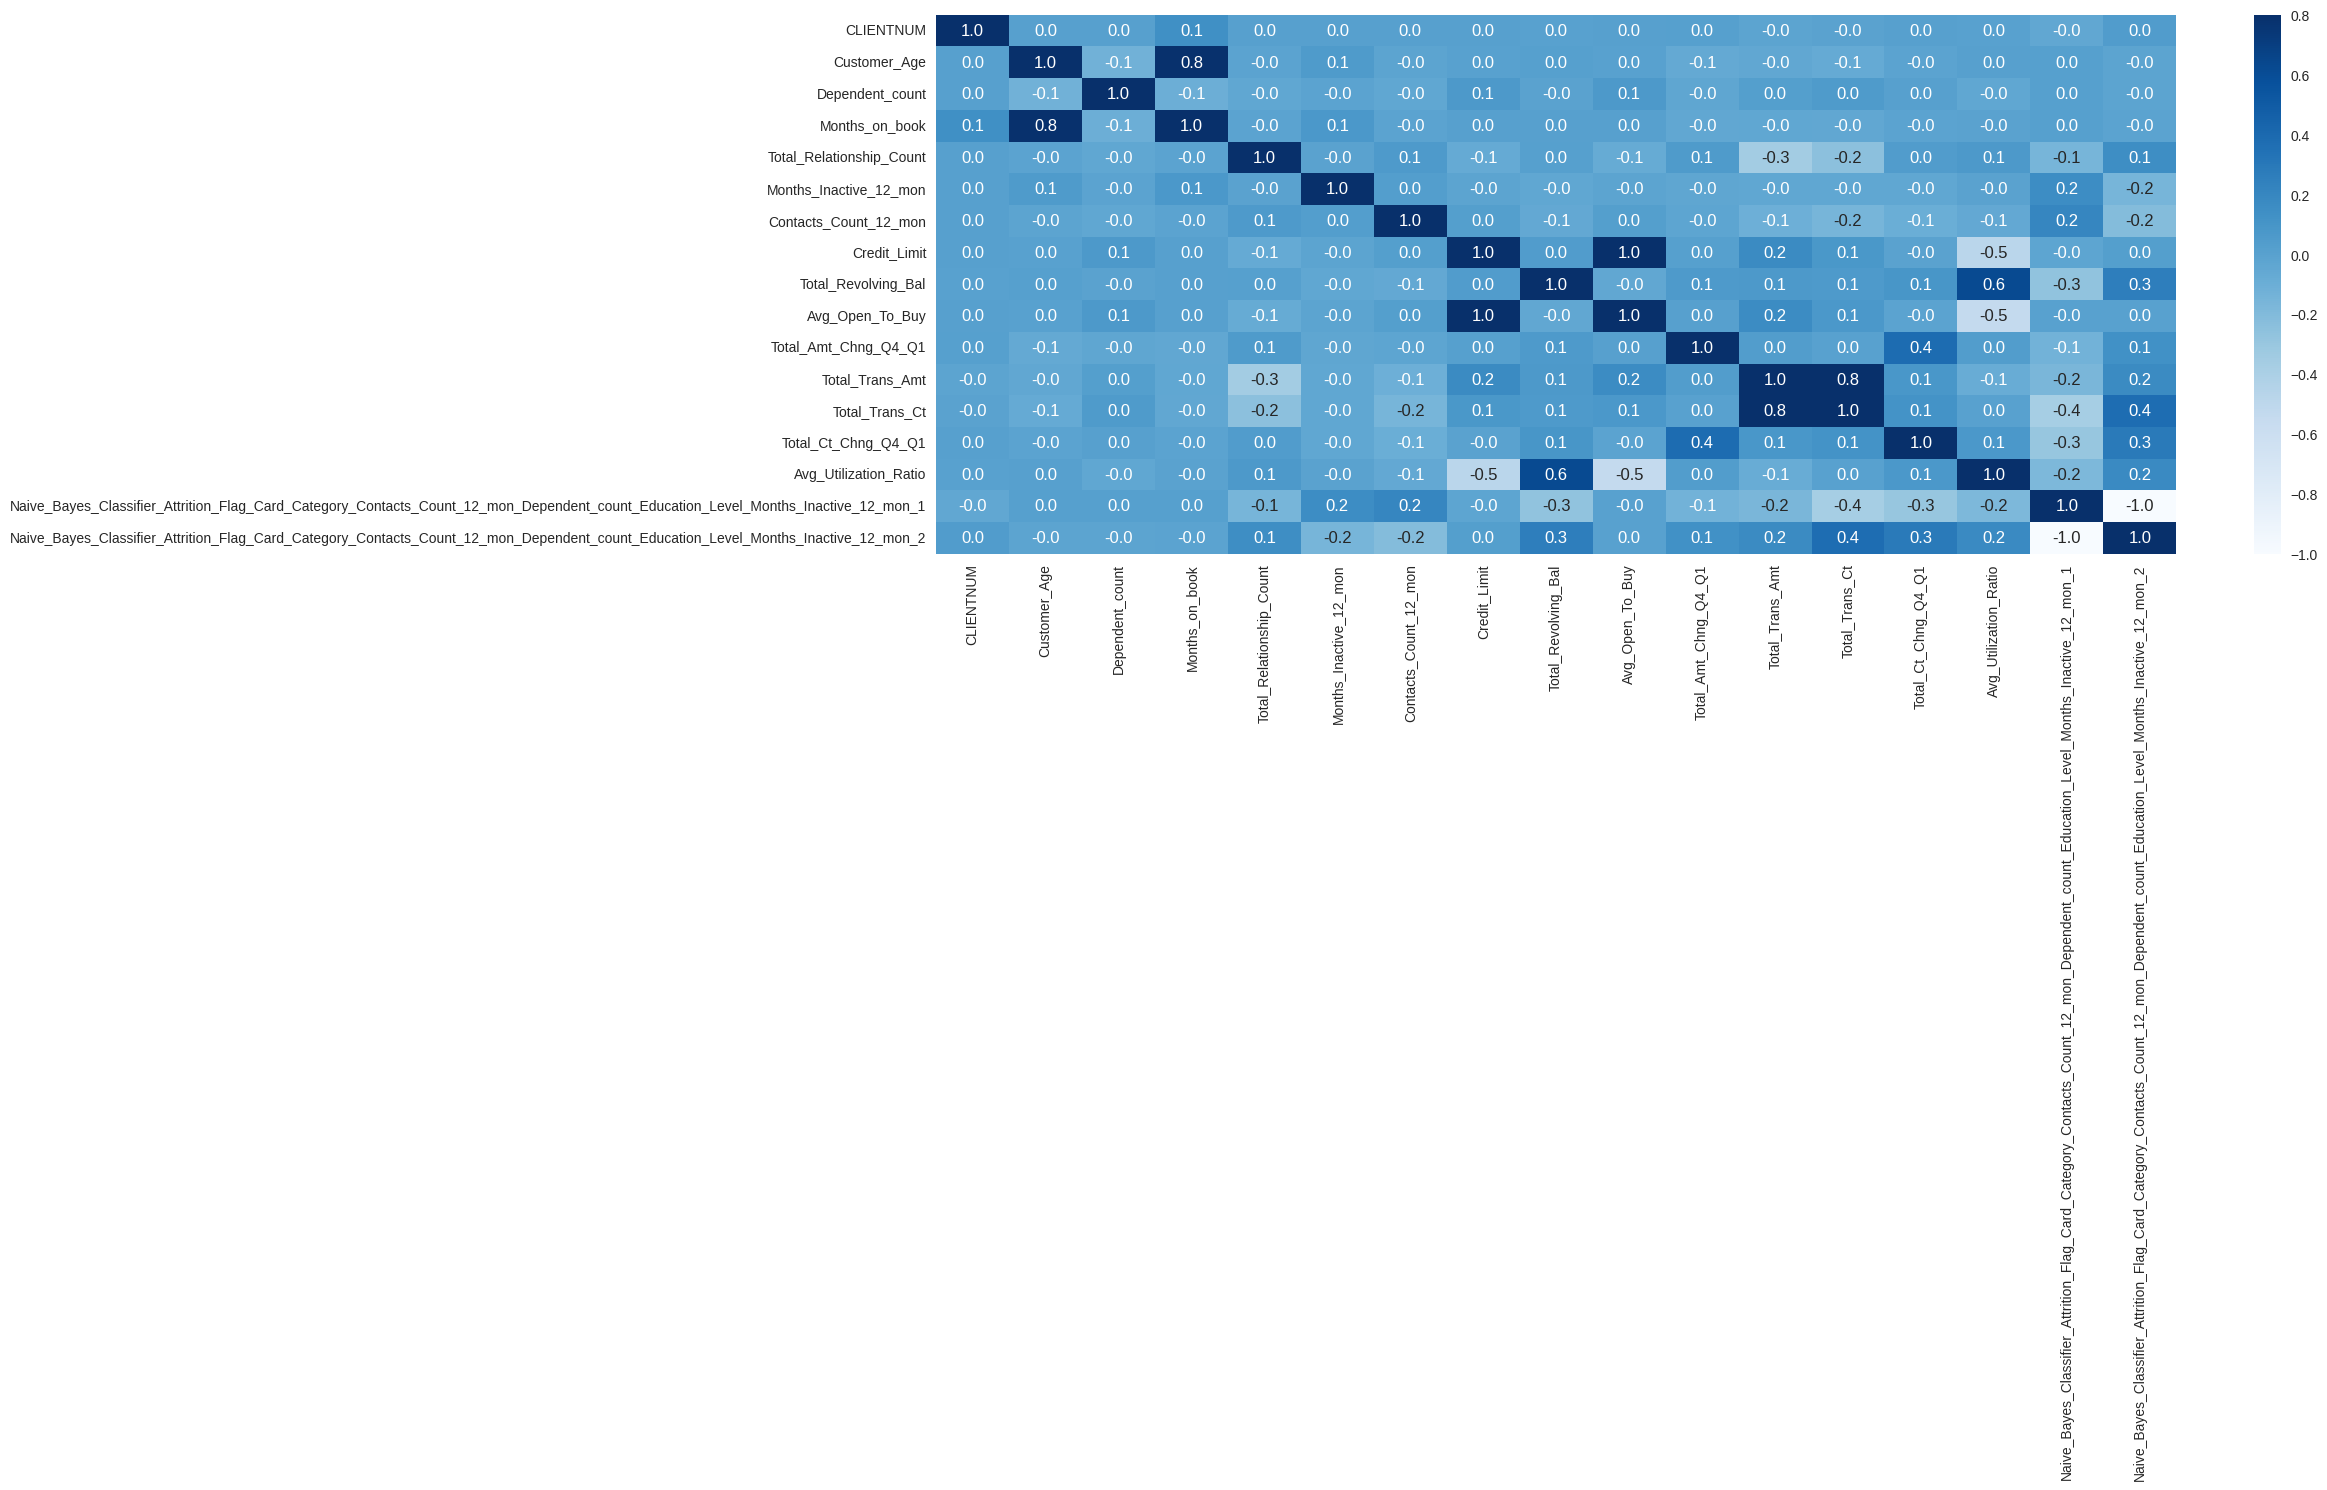

In [21]:
plt.figure(figsize=(20,7))
correlation=df.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='Blues',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);

# Data Preparation

In [22]:
df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [23]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype in ['int64' , 'float64']:
      numerical.append(col)
    else:
      catgcols.append(col)

for col in df.columns:
    if col in numerical:
      df[col].fillna(df[col].median(), inplace=True)
    else:
      df[col].fillna(df[col].mode()[0], inplace=True)

In [24]:
numerical

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [25]:
catgcols

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [26]:
LE=LabelEncoder()
for i in catgcols:
    df[i]=df[[i]].apply(LE.fit_transform)

# Modelling

In [27]:
sub_df = df[['Customer_Age', 'Dependent_count', 'Education_Level',
            'Marital_Status', 'Income_Category', 'Months_on_book',
            'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
            'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct']]

sub_df.head()

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
0,45,3,3,1,2,39,5,1,3,12691.0,1144,42
1,49,5,2,2,4,44,6,1,2,8256.0,1291,33
2,51,3,2,1,3,36,4,1,0,3418.0,1887,20
3,40,4,3,3,4,34,3,4,1,3313.0,1171,20
4,40,3,5,1,2,21,5,1,0,4716.0,816,28


In [28]:
scaler = StandardScaler()
scaler.fit(sub_df)
scaled_sub_df = pd.DataFrame(scaler.transform(sub_df),columns= sub_df.columns )

scaled_sub_df.head()

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
0,-0.165406,0.503368,-0.052637,-0.628128,-0.574182,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.959707,-0.973895
1,0.333570,2.043199,-0.597678,0.727306,0.755053,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.916433,-1.357340
2,0.583058,0.503368,-0.597678,-0.628128,0.090436,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-0.740982,-1.911206
3,-0.789126,1.273283,-0.052637,2.082739,0.755053,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,-0.951758,-1.911206
4,-0.789126,0.503368,1.037447,-0.628128,-0.574182,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.056263,-1.570365


In [29]:
wcss=[]
for i in range (1,11):
  model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=1000, random_state=42)
  model.fit(sub_df)
  wcss.append(model.inertia_)

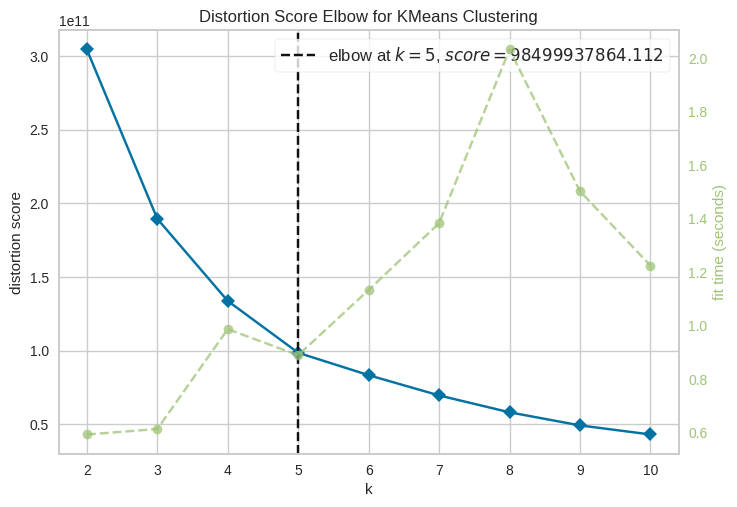

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(sub_df)
Elbow_M.show()

In [31]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(sub_df)
silhouette_avg = silhouette_score(sub_df, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5518763795460461


In [32]:
df['Cluster'] = y_kmeans
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
0,1,45,1,3,3,1,2,0,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,1,49,0,5,2,2,4,0,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,1,51,1,3,2,1,3,0,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2
3,1,40,0,4,3,3,4,0,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2
4,1,40,1,3,5,1,2,0,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,4
10123,0,41,1,2,6,0,1,0,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,2
10124,0,44,0,1,3,1,4,0,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,4
10125,0,30,1,2,2,3,1,0,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,2


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127.0,0.839340,0.367235,0.0,1.000,1.000,1.000,1.000
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Gender,10127.0,0.470919,0.499178,0.0,0.000,0.000,1.000,1.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Education_Level,10127.0,3.096574,1.834812,0.0,2.000,3.000,5.000,6.000
Marital_Status,10127.0,1.463415,0.737808,0.0,1.000,1.000,2.000,3.000
Income_Category,10127.0,2.863928,1.504700,0.0,2.000,3.000,4.000,5.000
Card_Category,10127.0,0.179816,0.693039,0.0,0.000,0.000,0.000,3.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000


In [34]:
df.Cluster.value_counts()

2    5902
0    1906
3     933
1     802
4     584
Name: Cluster, dtype: int64

# Visualisasi Hasil Modelling

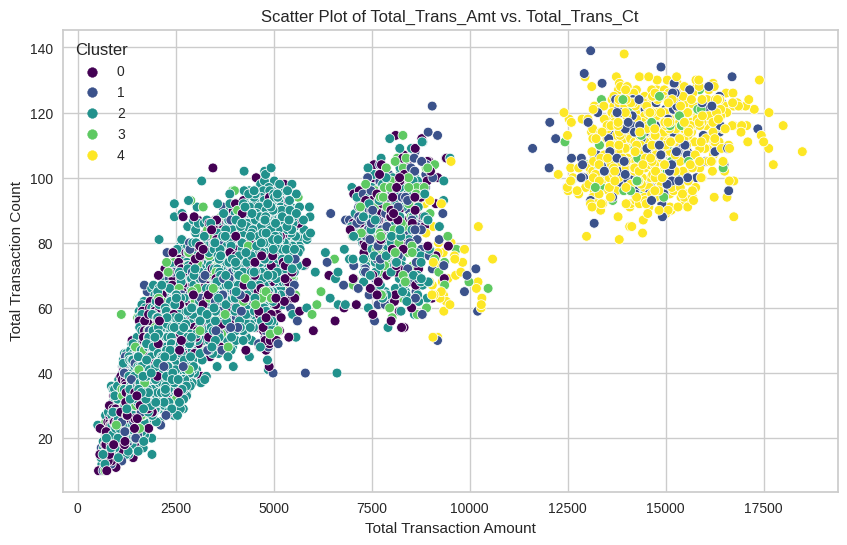

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Cluster', palette='viridis', s=50)
plt.title('Scatter Plot of Total_Trans_Amt vs. Total_Trans_Ct')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')
plt.show()

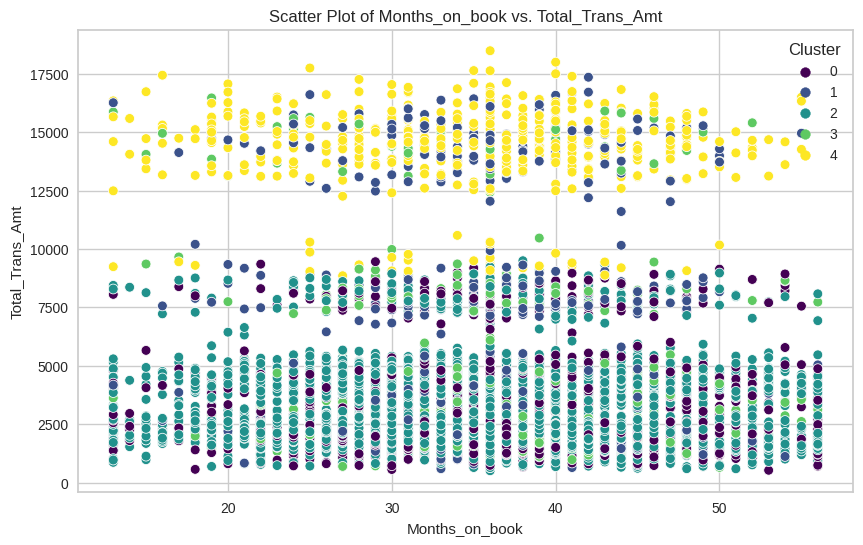

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Months_on_book', y='Total_Trans_Amt', hue='Cluster', palette='viridis', s=50)
plt.title('Scatter Plot of Months_on_book vs. Total_Trans_Amt')
plt.xlabel('Months_on_book')
plt.ylabel('Total_Trans_Amt')
plt.show()

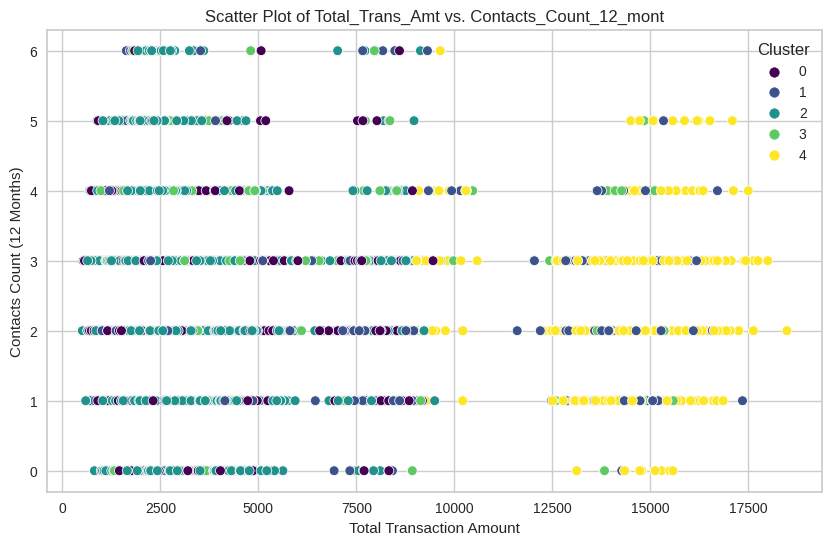

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Trans_Amt', y='Contacts_Count_12_mon', data=df, hue='Cluster', palette='viridis', s=50)
plt.title('Scatter Plot of Total_Trans_Amt vs. Contacts_Count_12_mont')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Contacts Count (12 Months)')
plt.legend(title='Cluster')
plt.show()

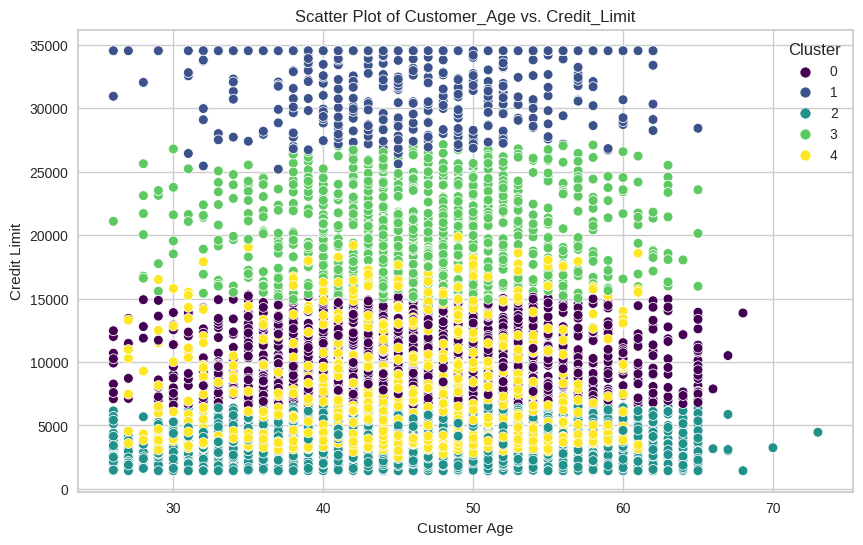

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_Age', y='Credit_Limit', data=df, hue='Cluster', palette='viridis', s=50)
plt.title('Scatter Plot of Customer_Age vs. Credit_Limit')
plt.xlabel('Customer Age')
plt.ylabel('Credit Limit')
plt.legend(title='Cluster')
plt.show()

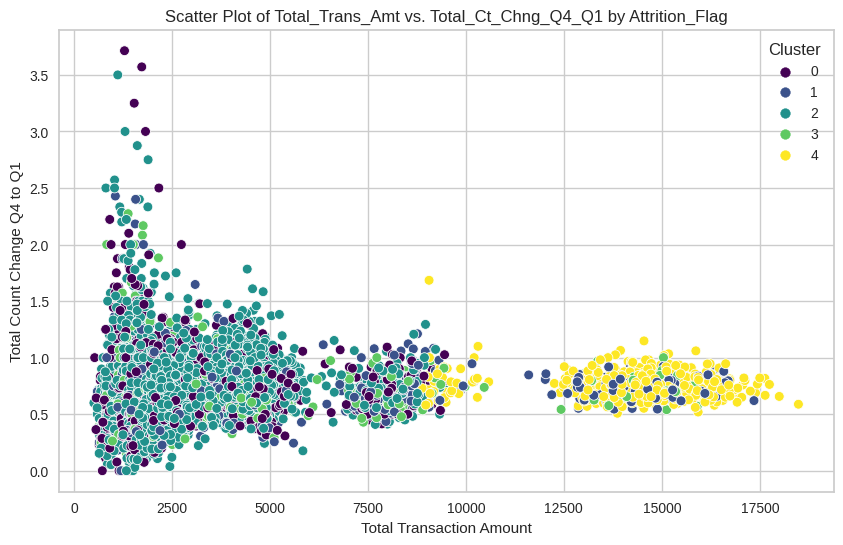

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Ct_Chng_Q4_Q1', data=df, hue='Cluster', palette='viridis', s=50)
plt.title('Scatter Plot of Total_Trans_Amt vs. Total_Ct_Chng_Q4_Q1 by Attrition_Flag')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Count Change Q4 to Q1')
plt.legend(title='Cluster')
plt.show()

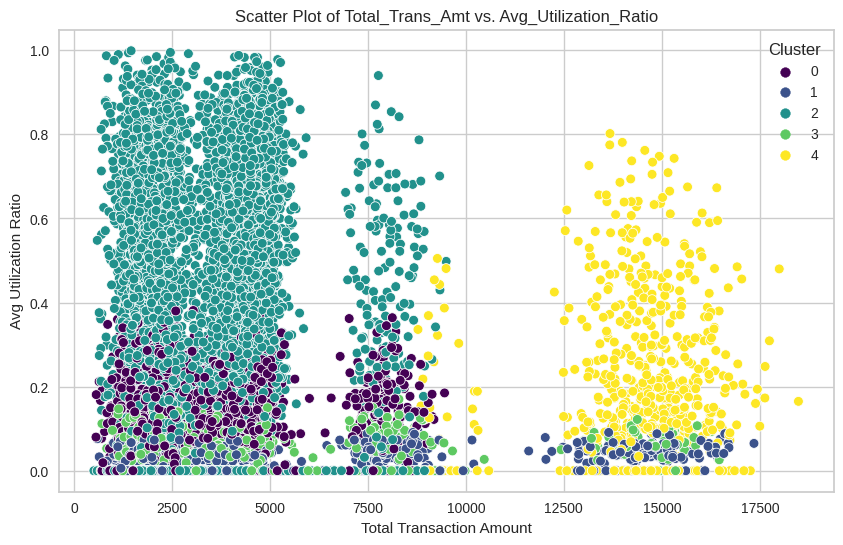

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Trans_Amt', y='Avg_Utilization_Ratio', data=df, hue='Cluster', palette='viridis', s=50)
plt.title('Scatter Plot of Total_Trans_Amt vs. Avg_Utilization_Ratio')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Avg Utilization Ratio')
plt.legend(title='Cluster')
plt.show()

# Save Model

In [41]:
df.to_excel("output_cluster.xlsx")